In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\VINAMRA SHUKLA\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
# Data CLeanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Only getting Data Analysis Jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Dropping Nan values from the column for plotting
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [5]:
df_DA_US['salary_year_avg'].sample(10)

286808     86902.00
682952     90000.00
24377      70000.00
420001     80000.00
762928     55000.00
345235     66250.00
559140     65037.50
541843     98361.75
417916     85000.00
60043     120000.00
Name: salary_year_avg, dtype: float64

Using Pandas for plotting...

<Axes: >

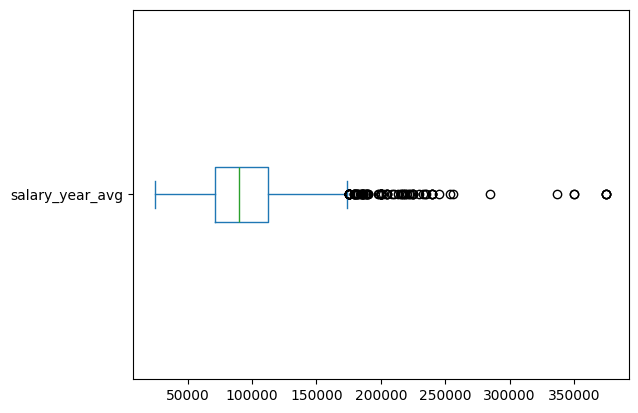

In [8]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)

------------------------------------------------------

# Understanding Boxplots

A **boxplot** (also called a box-and-whisker plot) is a standardized way of displaying the distribution of data based on five key summary statistics. It's excellent for visualizing the spread and skewness of data, and for identifying outliers.

## The Five Key Statistics

Looking at your plot of `salary_year_avg`, here's what each element represents:

### 1. **The Box (the rectangle)**
- **Left edge**: 25th percentile (Q1) - 25% of salaries fall below this value (~$60,000)
- **Right edge**: 75th percentile (Q3) - 75% of salaries fall below this value (~$110,000)
- **Box width**: This is the Interquartile Range (IQR = Q3 - Q1), which contains the middle 50% of your data

### 2. **The Line Inside the Box**
- **Median (50th percentile)**: The middle value when all salaries are sorted (~$95,000)
- Notice it's closer to the right edge, suggesting the lower half of salaries is more spread out

### 3. **The Whiskers (horizontal lines extending from the box)**
- **Left whisker**: Extends to the smallest value within 1.5 × IQR below Q1 (~$40,000)
- **Right whisker**: Extends to the largest value within 1.5 × IQR above Q3 (~$170,000)
- These capture the "typical" range of data

### 4. **The Circles/Dots**
- **Outliers**: Values that fall beyond the whiskers (more than 1.5 × IQR from the box edges)
- Your plot shows several high-salary outliers ranging from ~$200,000 to ~$375,000
- These represent unusually high salaries compared to the bulk of the data

## What Your Plot Tells You

From your salary data:
- **Typical salary range**: $40,000 - $170,000 (within whiskers)
- **Middle 50% earn**: $60,000 - $110,000 (the box)
- **Median salary**: ~$95,000
- **Distribution**: Right-skewed (positively skewed) - there's a long tail of high earners
- **Outliers**: Several people earning $200,000+ (executives, senior specialists, etc.)

Boxplots are particularly useful when comparing multiple groups side-by-side or when you want a quick visual summary without showing every individual data point!

---------------------------------------------

Using Matplotlib for plotting....

{'whiskers': [<matplotlib.lines.Line2D at 0x18e0014c550>,
 'caps': [<matplotlib.lines.Line2D at 0x18e0014d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e00143c50>],
 'medians': [<matplotlib.lines.Line2D at 0x18e0014ead0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e0014f410>],
 'means': []}

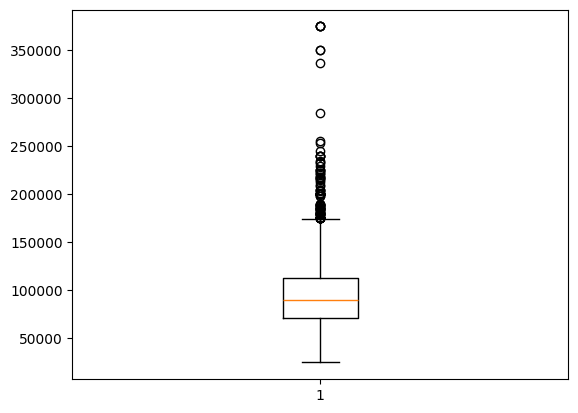

In [7]:
plt.boxplot(df_DA_US['salary_year_avg'])

**----------------------------------------------------------------------------------------**

Lets link it to the Histogram which we made previously.

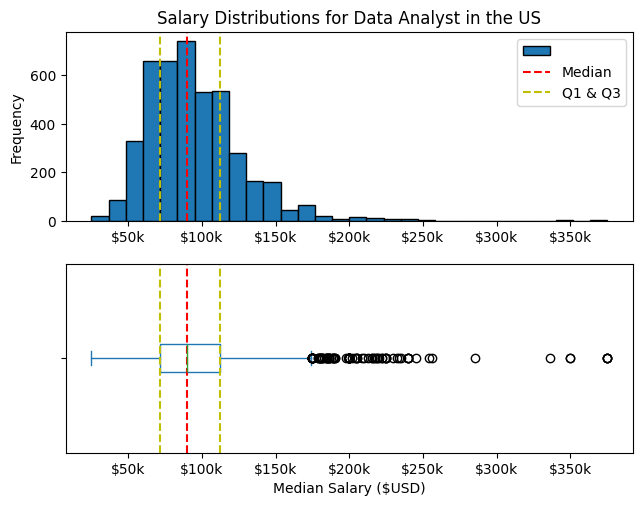

In [9]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

**------------------------------------------------------------------------------------------------**

Let's continue with our Data Analysis BoxPlot............

Let's try compairing different salaries of different job titles in the United States....

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', "Data Scientist"]

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset = ['salary_year_avg'])                                  # dropping the Nan values

In [13]:
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

C:\Users\VINAMRA SHUKLA\AppData\Local\Temp\ipykernel_13708\1982186417.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


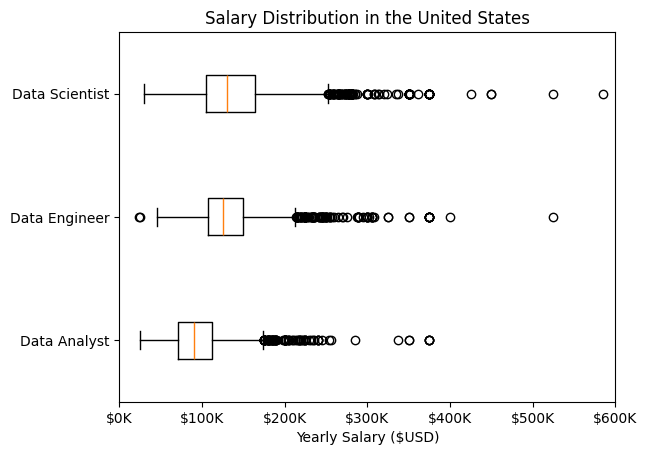

In [20]:
job_titles = ['Data Analyst', 'Data Engineer', "Data Scientist"]

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])                                  # dropping the Nan values

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()